# Predicting Weight Based on Eating Habits and Physical Condition
by Anam Khan, Farah Mallah, Liis Usin, Reihaneh Sadraei

## Exploring the data
Loading the dataset and displaying basic information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset and check the values present

data = pd.read_csv('ObesityDataSet.csv', delimiter=',')
print(str(data.shape[0])+' rows,', len(data.columns), 'columns')
data.sample(5)

2111 rows, 17 columns


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
233,Female,34.000000,1.680000,77.000000,yes,no,3.000000,1.000000,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Automobile,Overweight_Level_II
181,Female,23.000000,1.680000,67.000000,yes,yes,2.000000,3.000000,Frequently,no,1.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
1910,Female,21.521294,1.803677,160.639405,yes,yes,3.000000,3.000000,Sometimes,no,2.404049,no,0.427905,0.639894,Sometimes,Public_Transportation,Obesity_Type_III
1421,Male,21.587743,1.664752,94.256547,yes,yes,2.000000,2.976098,Sometimes,no,2.000000,no,0.000000,1.393220,no,Public_Transportation,Obesity_Type_I
1603,Male,24.244029,1.622297,99.982541,yes,yes,2.941929,3.989492,Sometimes,no,1.014135,no,1.958694,0.687342,no,Public_Transportation,Obesity_Type_II


In [3]:
# check if any none/null values

data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [4]:
# Look at the information about each columns and its dataset

data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
# Look at the information about the DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Looking into categorical values and what they contain

'NObeyesdad' is a label for the weight status

In [6]:
# the column to analyze and to categorize
column_name = 'NObeyesdad'

# Get the unique values and their counts in the specified column
unique_values_count = data[column_name].value_counts()

# Get the total number of unique non-numerical values
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'NObeyesdad': 7
Value counts:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64


'CAEC' is Consumption of food between meals

In [7]:
column_name = 'CAEC'

unique_values_count = data[column_name].value_counts()
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CAEC': 4
Value counts:
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64


'CALC' is and Consumption of alcohol

In [8]:
column_name = 'CALC' 

unique_values_count = data[column_name].value_counts()
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'CALC': 4
Value counts:
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64


'MTRANS' is means of Transportation used.

In [9]:
column_name = 'MTRANS' 

unique_values_count = data[column_name].value_counts()
total_unique_values = unique_values_count.shape[0]

print(f"Total unique non-numerical values in '{column_name}': {total_unique_values}")
print("Value counts:")
print(unique_values_count)

Total unique non-numerical values in 'MTRANS': 5
Value counts:
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64


### Reducing the transportation classes based on the physical activity

In [10]:
def split_transport(transportation):
    physical = [
        'Walking', 'Bike']

    carried = [
        'Automobile', 'Motorbike']

    if transportation in physical:
        return 'Walking, Bike'
    elif transportation in carried:
        return 'Automobile, Motorbike'
    else:
        return 'Public_Transportation'

Apply the function to create a new column for transportation where it's devided by physical activity

In [11]:
data['Transportation'] = data['MTRANS'].apply(split_transport)
data = data.drop('MTRANS', axis=1)

## Visualizing relationships / plotting the data

### Some visualization for categorical features

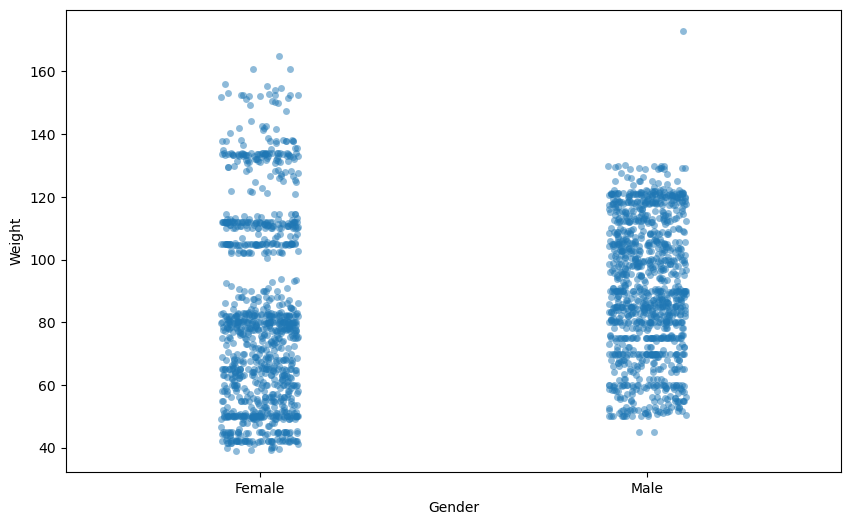

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['Gender'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

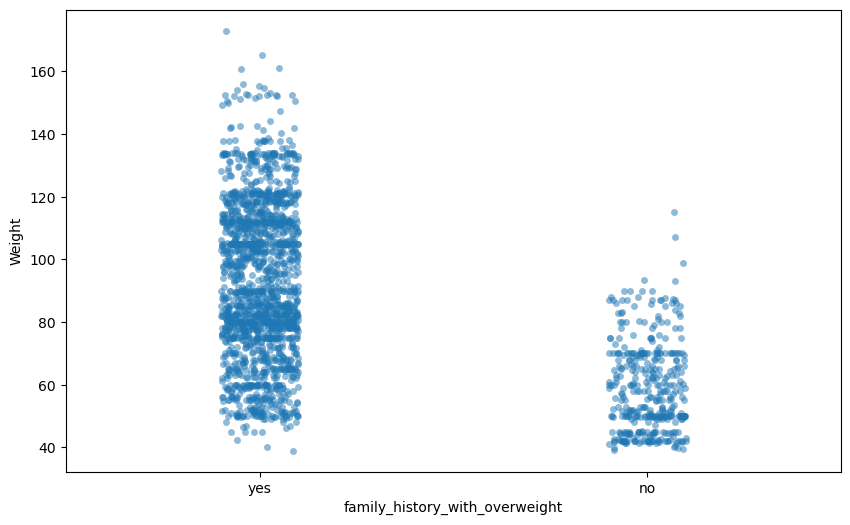

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['family_history_with_overweight'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

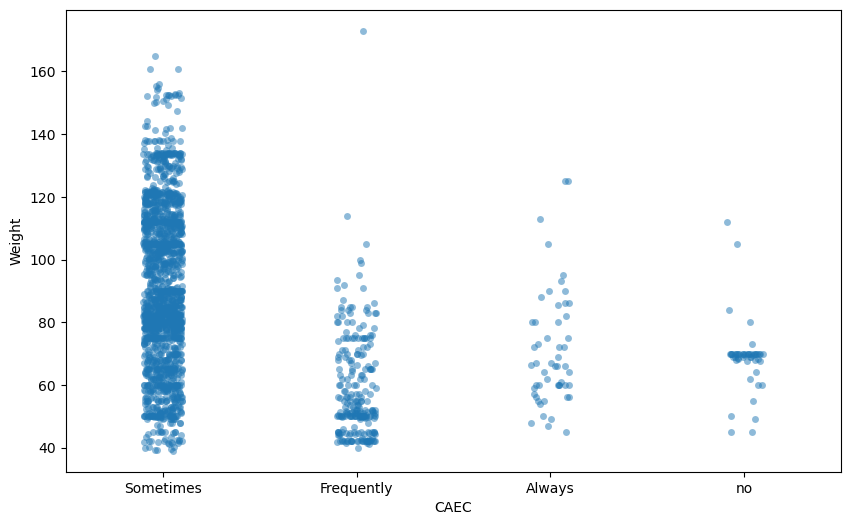

In [14]:
# eating food between meals

fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['CAEC'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

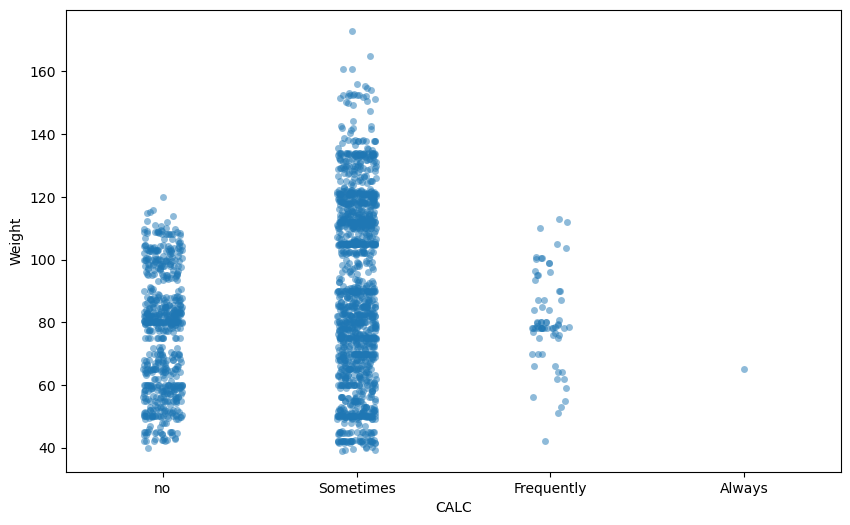

In [15]:
# Consumption of alcohol

fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(x=data['CALC'], y=data['Weight'], alpha=0.5, jitter=True, ax=ax)
plt.show()

### Some visualization for numerical features

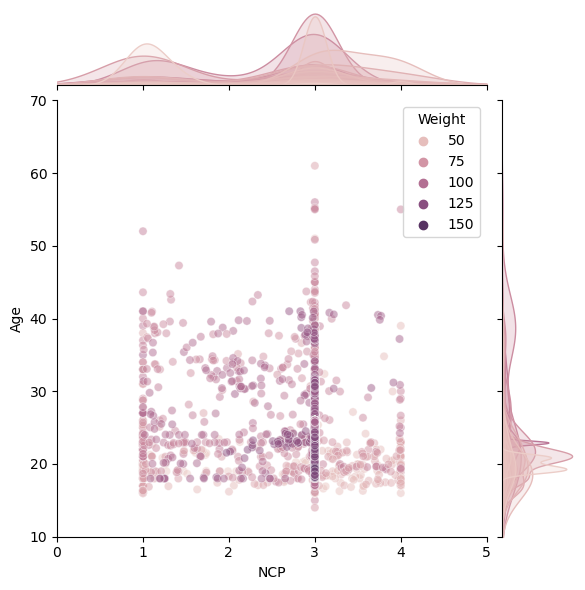

In [16]:
# Number of main meals

sns.jointplot(x=data['NCP'], y=data['Age'], alpha=0.5, hue=data['Weight'], height=6);

# Set the axis limits for zooming in
plt.xlim(0, 5)
plt.ylim(10, 70)

plt.show()

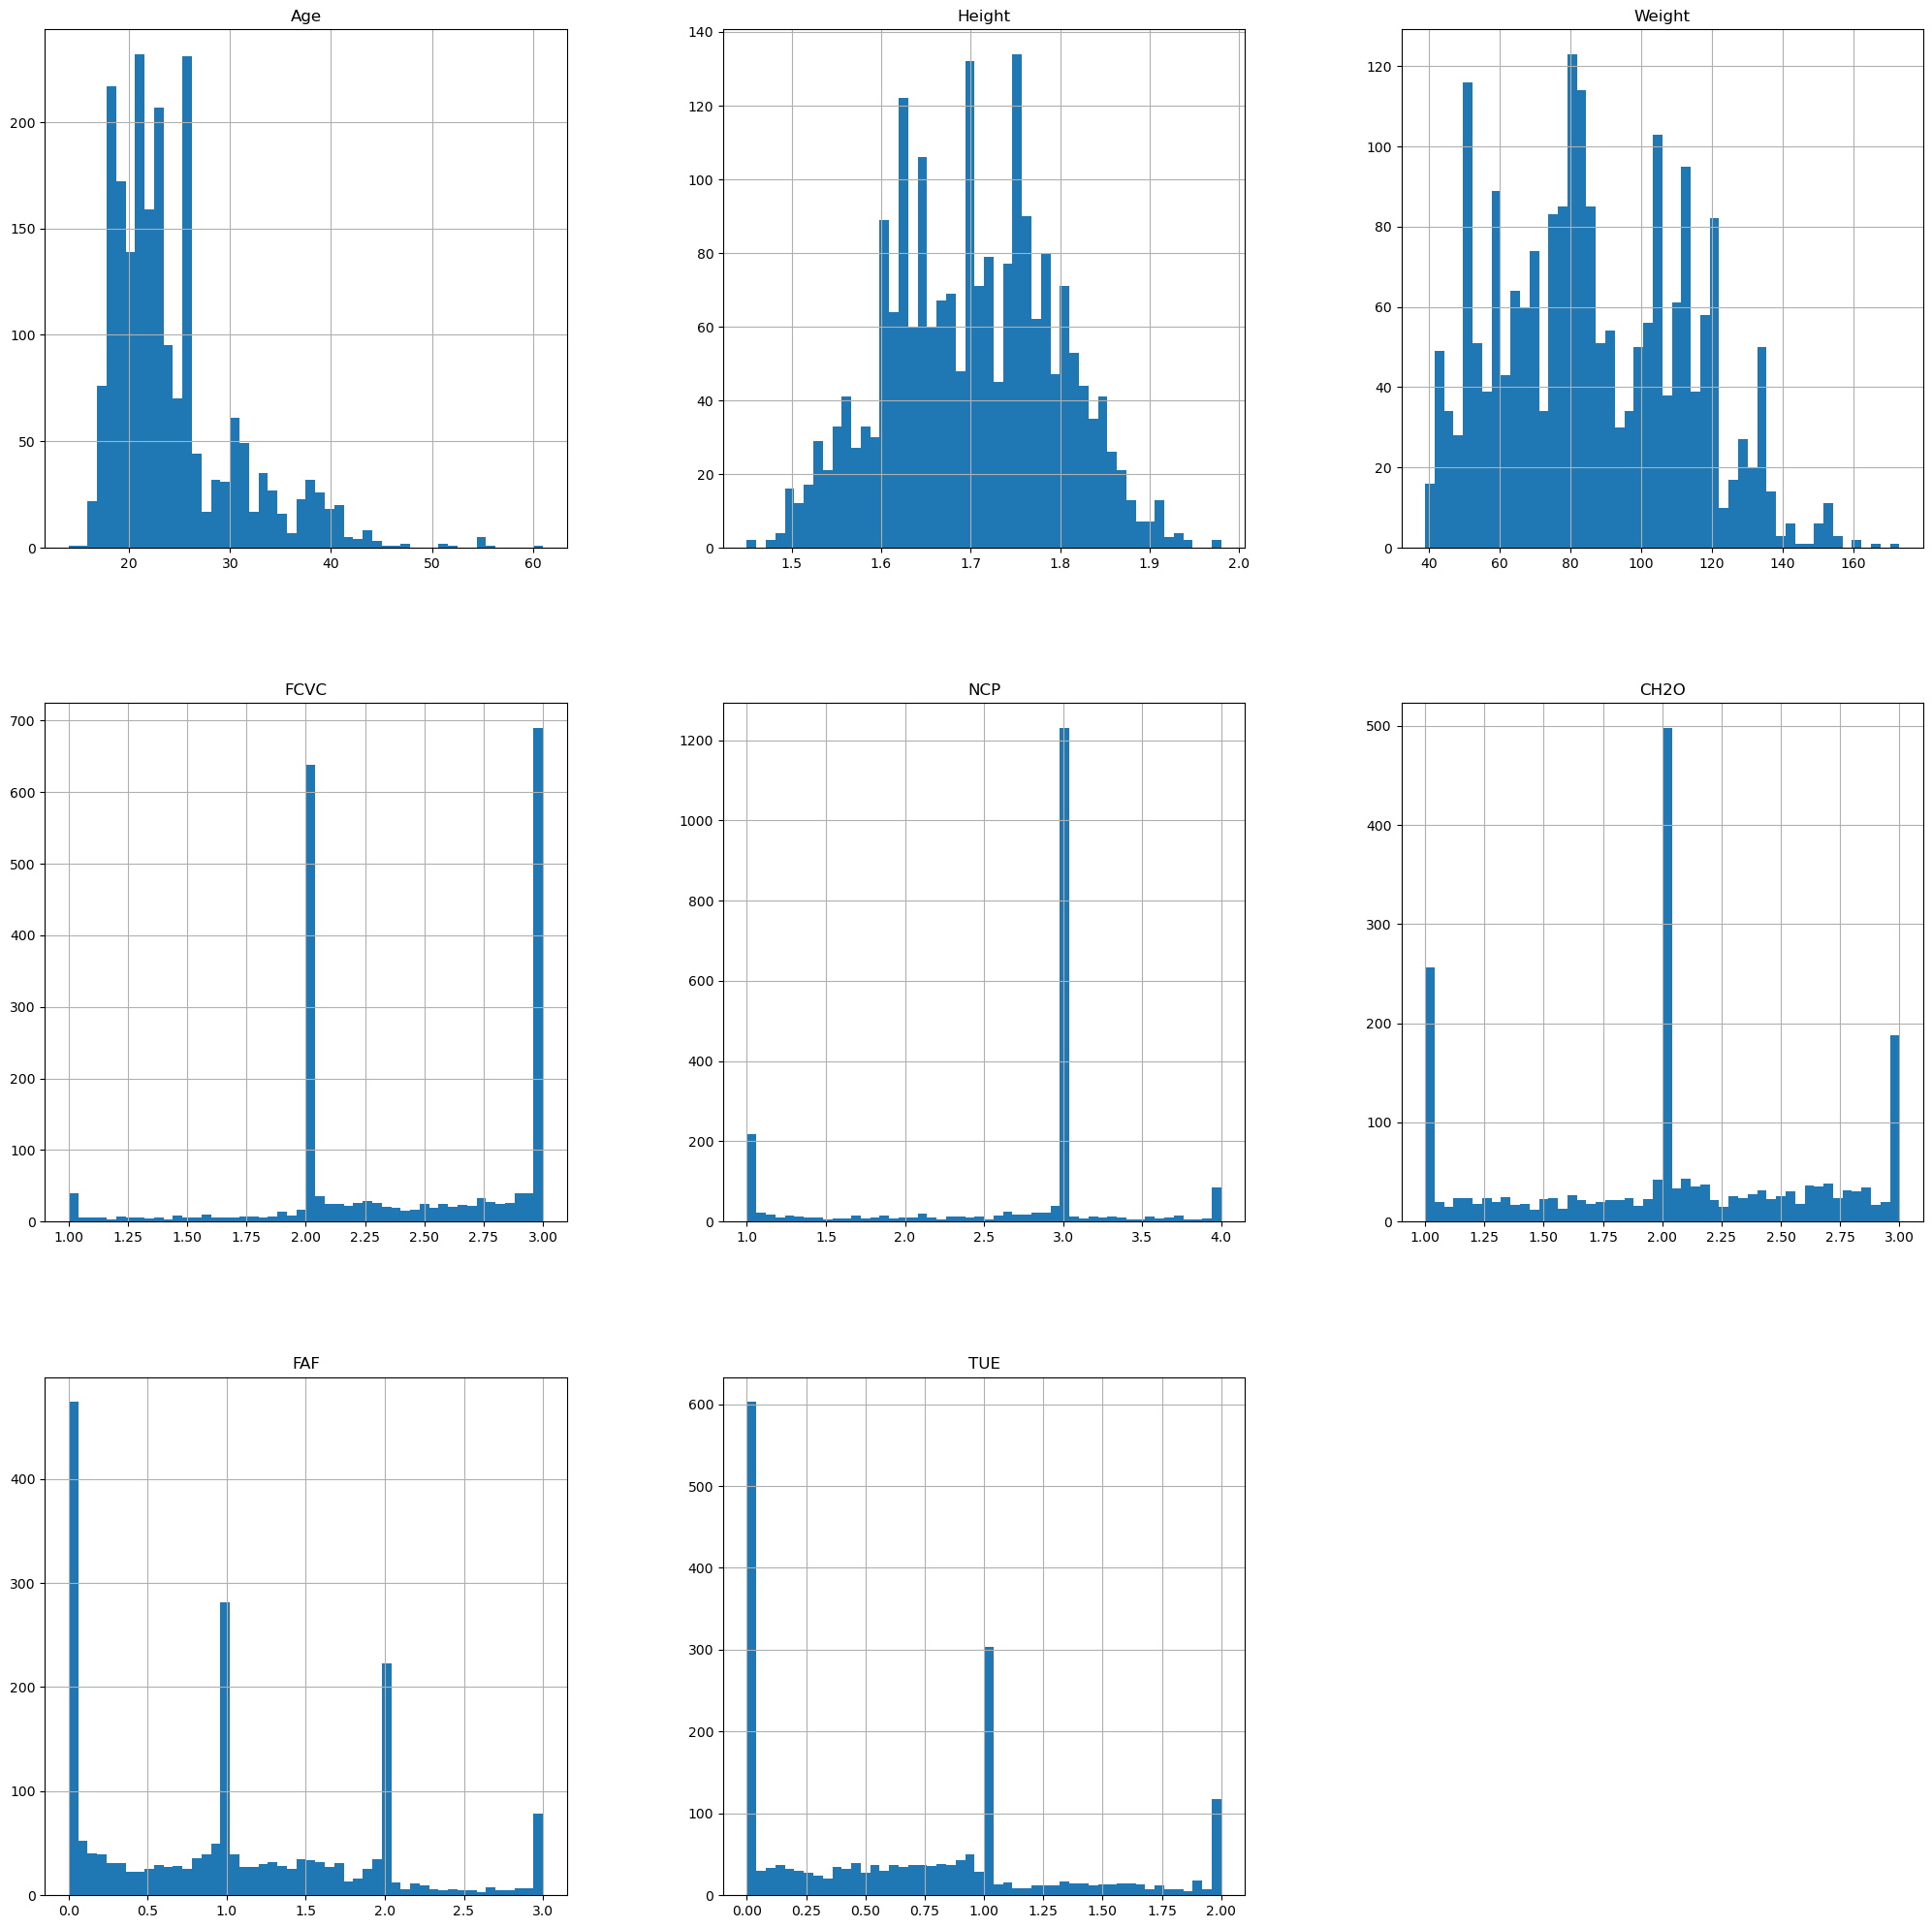

In [17]:
# histogram of different numerical data

%matplotlib inline
data.hist(bins=50, figsize=(25,25))
plt.show()

### Replacing values from lowest to highest risk

In [18]:
# Create a DataFrame from the data
df = pd.DataFrame(data)

In [19]:
df.replace({"NObeyesdad":{        
    "Obesity_Type_III":6, # HIGHEST risk
    "Obesity_Type_II":5,
    "Obesity_Type_I":4,
    "Overweight_Level_II":3,
    "Overweight_Level_I":2,
    "Normal_Weight":1,
    "Insufficient_Weight":0, # lowert risk
}},inplace=True)

The attributes related with the eating habits are:
- Frequent consumption of high caloric food (FAVC),
- Frequency of consumption of vegetables (FCVC),
- Number of main meals (NCP),
- Consumption of food between meals (CAEC),
- Consumption of water daily (CH20),
- and Consumption of alcohol (CALC).

The attributes related with the physical condition are:
- Calories consumption monitoring (SCC),
- Physical activity frequency (FAF),
- Time using technology devices (TUE),
- Transportation used (MTRANS),

<AxesSubplot:>

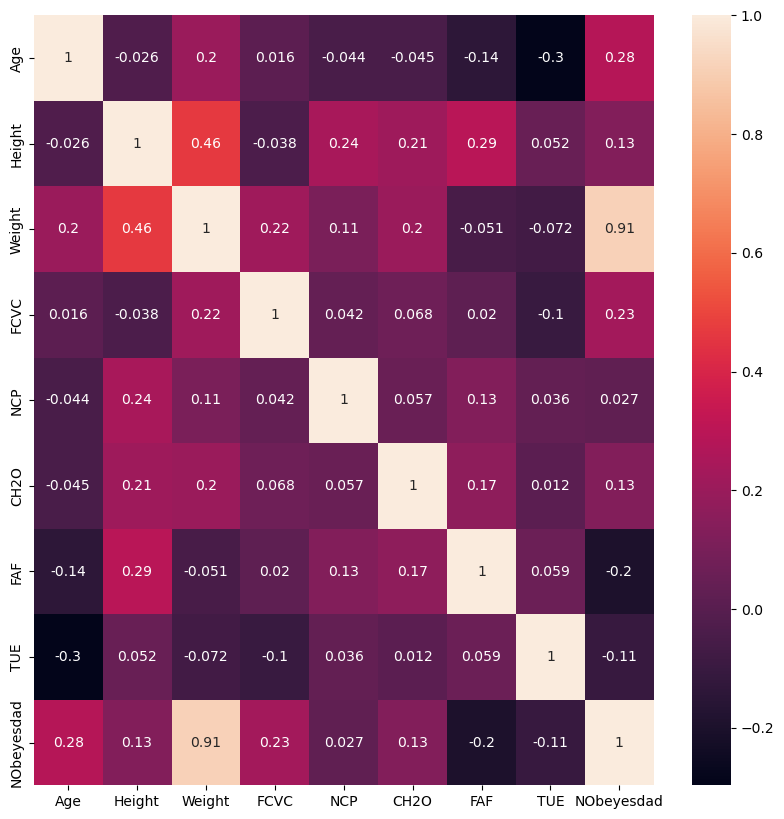

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
corr = data.corr()
sns.heatmap(corr, annot=True)

## Prepare the data
Preparing the data for modeling by handling missing values, encoding categorical features, scaling features, and splitting the data into training and testing sets.

In [21]:
# separating the last column from the rest

# BASED ON WEIGHT
df = df.drop("NObeyesdad", axis=1)

Here we drop the label/last column, but use weight as our target. So, based on the food and activity habits we try to evaluate the weight

In [22]:
# check the data that it looks correct

df.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Transportation
367,Female,40.000000,1.580000,63.000000,no,yes,2.000000,3.000000,Frequently,no,2.000000,no,3.000000,1.000000,Sometimes,Public_Transportation
1536,Male,25.154620,1.758398,112.089022,yes,yes,1.108663,3.000000,Sometimes,no,2.000000,no,1.230219,0.001716,Sometimes,"Automobile, Motorbike"
1400,Female,23.000000,1.649736,84.134712,yes,yes,2.334474,1.496776,Sometimes,no,2.776724,no,0.782416,0.167728,no,Public_Transportation
1172,Female,34.176795,1.681021,77.392179,yes,yes,2.796060,1.971472,Sometimes,no,1.921601,no,0.935217,0.704637,no,"Automobile, Motorbike"
1472,Female,19.275687,1.623377,82.851318,yes,yes,1.276858,2.918124,Sometimes,no,1.403784,no,0.552511,1.560402,Sometimes,Public_Transportation


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

def transform_data(X, X_test):
    numeric_columns = X.select_dtypes(exclude='object').columns
    categorical_columns = X.select_dtypes(include='object').columns

    numeric_features = Pipeline([
        ('handlingmissingvalues',SimpleImputer(strategy='median')),
        ('preprocessing', PolynomialFeatures(degree=2)),
        ('scaling',StandardScaler(with_mean=True))
    ])

    categorical_features = Pipeline([
        ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
        ('encoding', OneHotEncoder()),
        ('scaling', StandardScaler(with_mean=False))
    ])

    processing = ColumnTransformer([
        ('numeric', numeric_features, numeric_columns),
        ('categorical', categorical_features, categorical_columns)
    ])

    processing.fit(X)  
    return processing.transform(X), processing.transform(X_test)

## Create Training and Test set

In [24]:
X_original=df.drop(columns="Weight")
y=df["Weight"]

In [25]:
# splitting to training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

print('Train X dataset shape:',X_train.shape)
print('Train y dataset shape', y_train.shape)
print('Test X dataset shape:',X_test.shape)
print('Test y dataset shape', y_test.shape)

Train X dataset shape: (1688, 15)
Train y dataset shape (1688,)
Test X dataset shape: (423, 15)
Test y dataset shape (423,)


In [26]:
X_train, X_test = transform_data(X_train, X_test)

## Helper function

In [27]:
# cross validation check of the models

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import math

def print_crossval(scores):
    MAE=-np.mean(scores['test_score'],axis=0)
    print(f'MAE = {MAE:.3f} (Mean Absolute Error for cross validation)')

In [28]:
def evaluate_the_model(y_test, y_pred):
    # Evaluating the model

    # Mean Absolute Error (MAE):
    # average absolute difference between the predicted and actual values
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE):
    # Performance of a predictive model - the smaller the value the better
    mse = mean_squared_error(y_test, y_pred)

    # Root Mean Squared Error (RMSE):
    # emphasizes larger errors
    rmse = math.sqrt(mse)

    # R-squared (R2):
    # fit of a regression model ~0.8 is good, but not great 
    r2 = r2_score(y_test, y_pred)

    # Mean Absolute Percentage Error (MAPE):
    # percentage difference between the predicted and actual values
    mape = (1/len(y_test)) * sum(abs((y_test - y_pred) / y_test)) * 100
    
    
    print("Mean Absolute Error (MAE) %.2f:" % mae)
    print("Mean Squared Error (MSE) %.2f:" % mse)
    print("Root Mean Squared Error (RMSE) %.2f:" % rmse)
    print("R-squared Score (R^2) %.2f:" % r2)
    print("Mean Absolute Percentage Error (MAPE) %.2f:" % mape)

In [29]:
def display_residualplot(residuals, y_pred):
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residual Plot')
    plt.show()

# Build ML models

## Random Forest Regression

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
print_crossval(cross_validate(random_forest, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
random_forest.fit(X_train, y_train)

MAE = 5.300 (Mean Absolute Error for cross validation)


RandomForestRegressor(random_state=42)

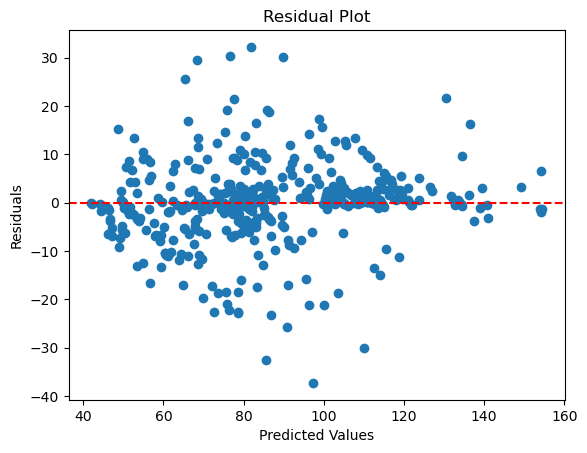

Mean Absolute Error (MAE) 5.52:
Mean Squared Error (MSE) 72.82:
Root Mean Squared Error (RMSE) 8.53:
R-squared Score (R^2) 0.90:
Mean Absolute Percentage Error (MAPE) 7.49:


In [32]:
y_pred8 = random_forest.predict(X_test)

residuals8 = y_test - y_pred8
display_residualplot(residuals8, y_pred8)
evaluate_the_model(y_test, y_pred8)

## XGBoost (Extreme Gradient Boosting)

In [33]:
# !pip install xgboost
import xgboost as xgb

In [34]:
# Creating and training a XG-Boost model

xgb_regressor = xgb.XGBRegressor()
print_crossval(cross_validate(xgb_regressor, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
xgb_regressor.fit(X_train,y_train)

MAE = 6.120 (Mean Absolute Error for cross validation)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

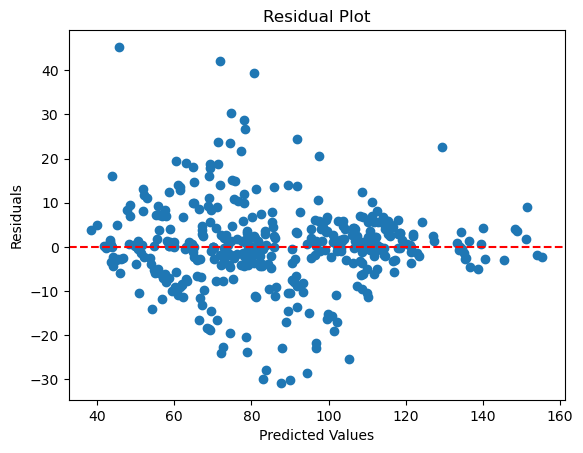

Mean Absolute Error (MAE) 6.32:
Mean Squared Error (MSE) 91.05:
Root Mean Squared Error (RMSE) 9.54:
R-squared Score (R^2) 0.87:
Mean Absolute Percentage Error (MAPE) 8.40:


In [35]:
y_pred44 = xgb_regressor.predict(X_test)
# Scatter plot of predicted values vs. residuals

residuals44 = y_test - y_pred44
display_residualplot(residuals44, y_pred44)
evaluate_the_model(y_test, y_pred44)

## LGBM (Light Gradient Boosting Machine)

In [36]:
# !pip install lightgbm -- NEEDS this
import lightgbm as lgb

In [37]:
lgb_train = lgb.Dataset(X_train, label=y_train)
# print_crossval(cross_validate(lgb_train, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
lgb_test = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',  
    'metric': 'l2' 
}

num_round = 100  # Number of boosting iterations
lgb_model = lgb.train(params, lgb_train, num_round)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8961
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 55
[LightGBM] [Info] Start training from score 86.598197


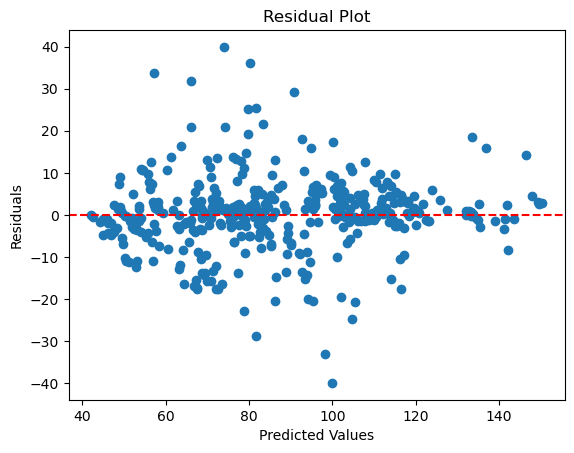

Mean Absolute Error (MAE) 5.80:
Mean Squared Error (MSE) 77.55:
Root Mean Squared Error (RMSE) 8.81:
R-squared Score (R^2) 0.89:
Mean Absolute Percentage Error (MAPE) 7.63:


In [38]:
y_pred10 = lgb_model.predict(X_test)

residuals10 = y_test - y_pred10
display_residualplot(residuals10, y_pred10)
evaluate_the_model(y_test, y_pred10)

## Hypertuned LGBM (Light Gradient Boosting Machine)

In [ ]:
# R-squared Score (R^2) 0.90:
# Mean Absolute Percentage Error (MAPE) 7.05:
lgb_model = lgb.LGBMRegressor()
print_crossval(cross_validate(lgb_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))

param_grid = {
    'num_leaves': [50],
    'learning_rate': [0.05],
    'n_estimators': [300],
    'colsample_bytree': [0.4]
}

grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.bestparams


best_lgb_model = lgb.LGBMRegressor(**best_params)
best_lgb_model.fit(X_train, y_train)

y_pred = best_lgb_model.predict(X_test)
residuals = y_test - y_pred
display_residualplot(residuals, y_pred)
print("Results gathered after tuning:")
evaluate_the_model(y_test, y_pred)

## Neural Network Regression

In [39]:
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
# model = keras.Sequential([
#     layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1)  # Predicting a continuous variable
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')  # You can choose the appropriate optimizer and loss function
# # print_crossval(cross_validate(model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))

# # Train the model
# model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# # Make predictions
# y_pred113 = model.predict(X_test)


In [41]:
# residuals113 = y_test - y_pred113
# display_residualplot(residuals113, y_pred113)
# evaluate_the_model(y_test, y_pred113)

In [43]:
# y_pred113 = y_pred113.ravel().tolist()

## KNeighborsRegressor

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
k_neighbors = KNeighborsRegressor(n_neighbors=5)  # Define the number of neighbors
print_crossval(cross_validate(k_neighbors, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
k_neighbors.fit(X_train, y_train)

MAE = 6.264 (Mean Absolute Error for cross validation)


KNeighborsRegressor()

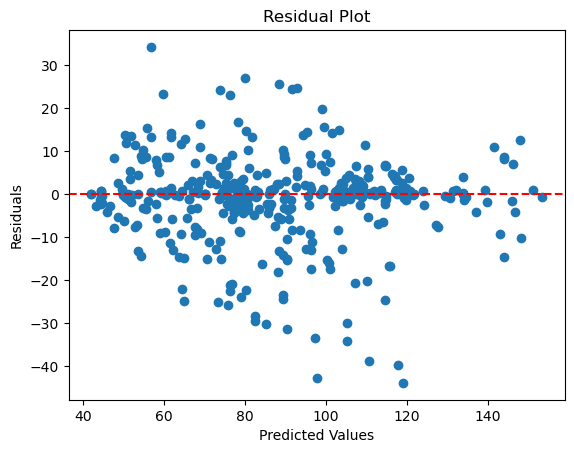

Mean Absolute Error (MAE) 6.15:
Mean Squared Error (MSE) 100.86:
Root Mean Squared Error (RMSE) 10.04:
R-squared Score (R^2) 0.86:
Mean Absolute Percentage Error (MAPE) 8.40:


In [46]:
y_pred12 = k_neighbors.predict(X_test)

residuals12 = y_test - y_pred12
display_residualplot(residuals12, y_pred12)
evaluate_the_model(y_test, y_pred12)

## Hypertuned KNeighborsRegressor

In [ ]:
# R-squared Score (R^2) 0.86:
# Mean Absolute Percentage Error (MAPE) 6.83:

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
print_crossval(cross_validate(knn, X_train, y_train, scoring='neg_mean_absolute_error', cv=10))

param_grid = {
    'n_neighbors': [2, 4, 6, 8],  # Number of neighbors to consider
    'weights': ['distance'],  # Weighting scheme for neighbors
    'p': [1]  # 1 for Manhattan distance, 2 for Euclidean distance
}
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, scoring = 'neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_knn_model = grid_search.bestestimator

y_pred = best_knn_model.predict(X_test)
residuals2 = y_test - y_pred
display_residualplot(residuals2, y_pred)
print("Results gathered after tuning:")
evaluate_the_model(y_test, y_pred)

## BaggingRegressor

In [48]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [49]:
base_model = DecisionTreeRegressor()  # Defining the base estimator
bagging = BaggingRegressor(base_model, n_estimators=10, random_state=42)  # Number of base estimators
print_crossval(cross_validate(bagging, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
bagging.fit(X_train, y_train)

MAE = 5.829 (Mean Absolute Error for cross validation)


BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=42)

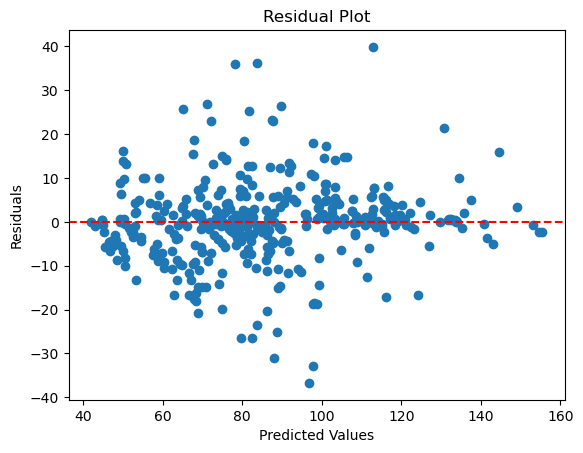

Mean Absolute Error (MAE) 5.85:
Mean Squared Error (MSE) 81.32:
Root Mean Squared Error (RMSE) 9.02:
R-squared Score (R^2) 0.88:
Mean Absolute Percentage Error (MAPE) 7.77:


In [50]:
y_pred13 = bagging.predict(X_test)

residuals13 = y_test - y_pred13
display_residualplot(residuals13, y_pred13)
evaluate_the_model(y_test, y_pred13)

## ExtraTreesRegressor

In [51]:
from sklearn.ensemble import ExtraTreesRegressor

In [52]:
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)
print_crossval(cross_validate(extra_trees, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
extra_trees.fit(X_train, y_train)

MAE = 4.581 (Mean Absolute Error for cross validation)


ExtraTreesRegressor(random_state=42)

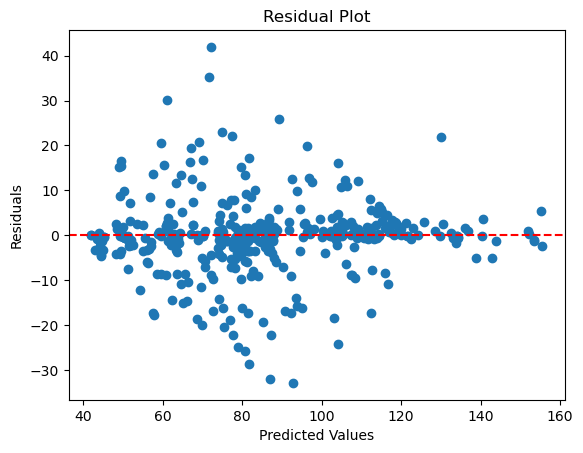

Mean Absolute Error (MAE) 4.91:
Mean Squared Error (MSE) 68.87:
Root Mean Squared Error (RMSE) 8.30:
R-squared Score (R^2) 0.90:
Mean Absolute Percentage Error (MAPE) 6.69:


In [53]:
y_pred15 = extra_trees.predict(X_test)

residuals15 = y_test - y_pred15
display_residualplot(residuals15, y_pred15)
evaluate_the_model(y_test, y_pred15)

## ML models tested but not continued with

Here we have left all the models we tried out but with default settings but didn't give good enough results to continue with hypertuning them.

### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
# Creating and training the Linear Regression model
linear_model = LinearRegression()
print_crossval(cross_validate(linear_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
linear_model.fit(X_train, y_train)

MAE = 419678.596 (Mean Absolute Error for cross validation)


LinearRegression()

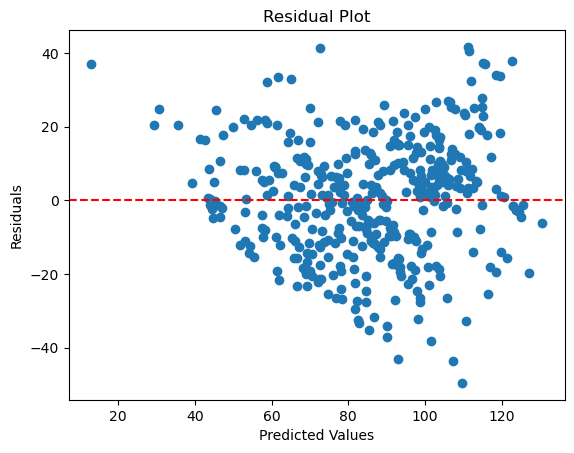

Mean Absolute Error (MAE) 12.66:
Mean Squared Error (MSE) 251.28:
Root Mean Squared Error (RMSE) 15.85:
R-squared Score (R^2) 0.64:
Mean Absolute Percentage Error (MAPE) 16.44:


In [56]:
y_pred1 = linear_model.predict(X_test)

residuals1 = y_test - y_pred1
display_residualplot(residuals1, y_pred1)
evaluate_the_model(y_test, y_pred1)

### Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [58]:
poly_model = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
print_crossval(cross_validate(poly_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
poly_model.fit(X_train, y_train)

MAE = 23351764339.968 (Mean Absolute Error for cross validation)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

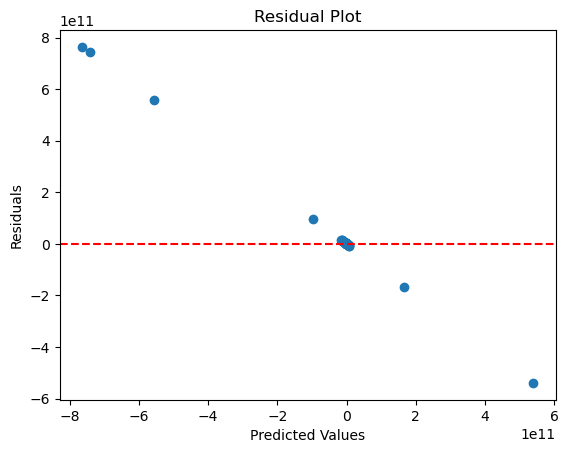

Mean Absolute Error (MAE) 7104811079.47:
Mean Squared Error (MSE) 4198940241314077212672.00:
Root Mean Squared Error (RMSE) 64799230252.48:
R-squared Score (R^2) -5955006575473181696.00:
Mean Absolute Percentage Error (MAPE) 9771174821.41:


In [59]:
y_pred2 = poly_model.predict(X_test)

residuals2 = y_test - y_pred2
display_residualplot(residuals2, y_pred2)
evaluate_the_model(y_test, y_pred2)

### Ridge Regression

In [60]:
from sklearn.linear_model import Ridge

In [61]:
# Creating and fitting the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # 'alpha' is the regularization parameter
print_crossval(cross_validate(ridge_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
ridge_model.fit(X_train, y_train)

MAE = 12.675 (Mean Absolute Error for cross validation)


Ridge()

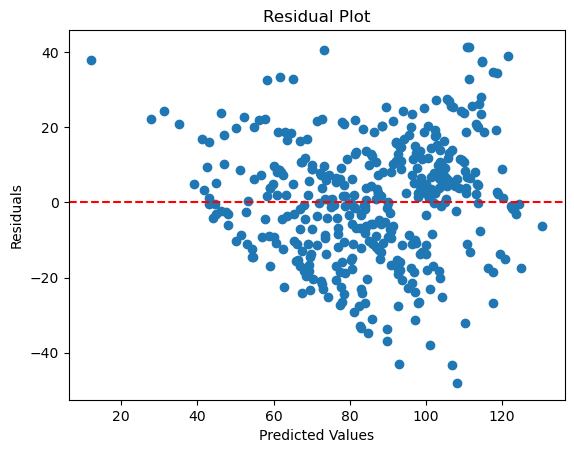

Mean Absolute Error (MAE) 12.66:
Mean Squared Error (MSE) 251.69:
Root Mean Squared Error (RMSE) 15.86:
R-squared Score (R^2) 0.64:
Mean Absolute Percentage Error (MAPE) 16.43:


In [62]:
y_pred3 = ridge_model.predict(X_test)

residuals3 = y_test - y_pred3
display_residualplot(residuals3, y_pred3)
evaluate_the_model(y_test, y_pred3)

### Lasso Regression

In [63]:
from sklearn.linear_model import Lasso

In [64]:
# Creating and fitting the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # 'alpha' is the regularization parameter
print_crossval(cross_validate(lasso_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
lasso_model.fit(X_train, y_train)

MAE = 13.838 (Mean Absolute Error for cross validation)


Lasso()

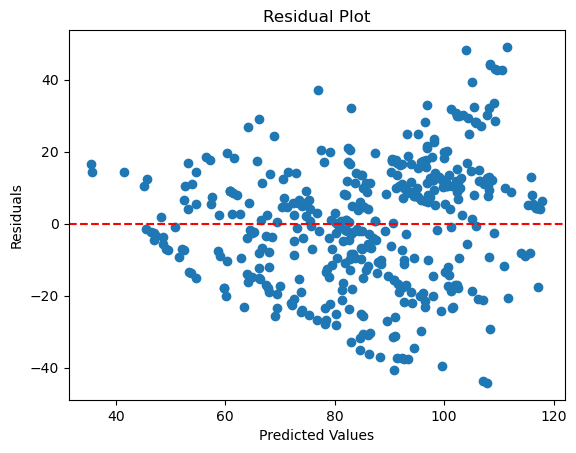

Mean Absolute Error (MAE) 14.14:
Mean Squared Error (MSE) 300.72:
Root Mean Squared Error (RMSE) 17.34:
R-squared Score (R^2) 0.57:
Mean Absolute Percentage Error (MAPE) 18.10:


In [65]:
y_pred4 = lasso_model.predict(X_test)

residuals4 = y_test - y_pred4
display_residualplot(residuals4, y_pred4)
evaluate_the_model(y_test, y_pred4)

### ElasticNet Regression

In [66]:
from sklearn.linear_model import ElasticNet

In [67]:
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
print_crossval(cross_validate(elasticnet_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
elasticnet_model.fit(X_train, y_train)

MAE = 14.063 (Mean Absolute Error for cross validation)


ElasticNet()

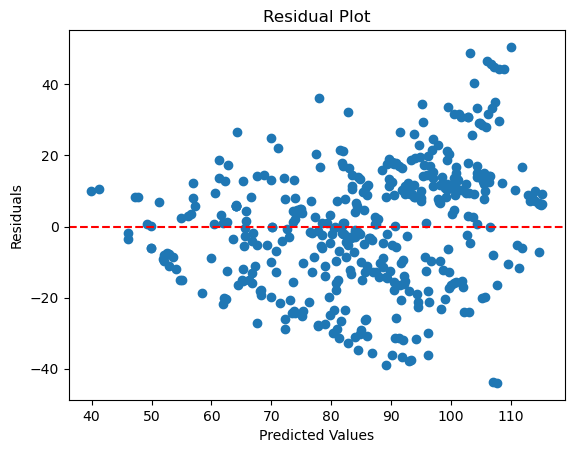

Mean Absolute Error (MAE) 14.15:
Mean Squared Error (MSE) 305.35:
Root Mean Squared Error (RMSE) 17.47:
R-squared Score (R^2) 0.57:
Mean Absolute Percentage Error (MAPE) 18.13:


In [68]:
y_pred5 = elasticnet_model.predict(X_test)

residuals5 = y_test - y_pred5
display_residualplot(residuals5, y_pred5)
evaluate_the_model(y_test, y_pred5)

### Support Vector Regression (SVR)

In [69]:
from sklearn.svm import SVR

In [70]:
svr_model = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel for non-linear regression
print_crossval(cross_validate(svr_model, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
svr_model.fit(X_train, y_train)

MAE = 12.769 (Mean Absolute Error for cross validation)


SVR()

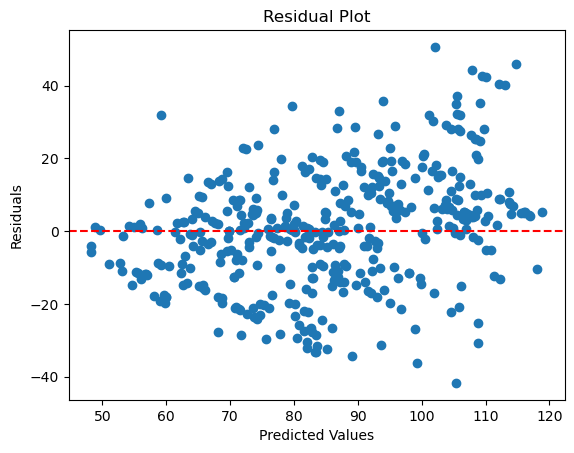

Mean Absolute Error (MAE) 12.34:
Mean Squared Error (MSE) 253.66:
Root Mean Squared Error (RMSE) 15.93:
R-squared Score (R^2) 0.64:
Mean Absolute Percentage Error (MAPE) 15.87:


In [71]:
y_pred6 = svr_model.predict(X_test)

residuals6 = y_test - y_pred6
display_residualplot(residuals6, y_pred6)
evaluate_the_model(y_test, y_pred6)

### Decision Tree Regression

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
decision_tree = DecisionTreeRegressor(max_depth=5)  # Set the max depth to avoid overfitting
print_crossval(cross_validate(decision_tree, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
decision_tree.fit(X_train, y_train)

MAE = 10.747 (Mean Absolute Error for cross validation)


DecisionTreeRegressor(max_depth=5)

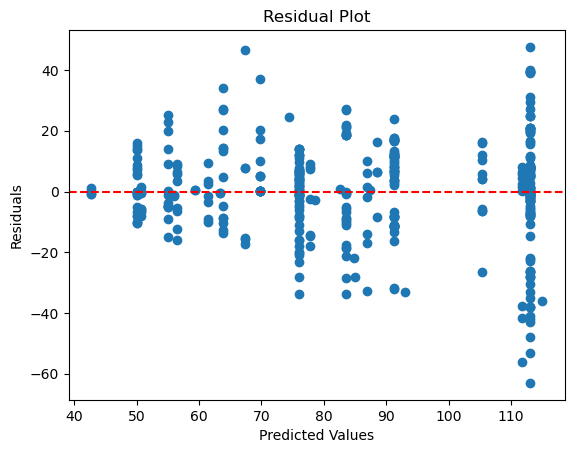

Mean Absolute Error (MAE) 11.55:
Mean Squared Error (MSE) 254.40:
Root Mean Squared Error (RMSE) 15.95:
R-squared Score (R^2) 0.64:
Mean Absolute Percentage Error (MAPE) 14.39:


In [74]:
y_pred7 = decision_tree.predict(X_test)

residuals7 = y_test - y_pred7
display_residualplot(residuals7, y_pred7)
evaluate_the_model(y_test, y_pred7)

### Gradient Boosting Regression

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
print_crossval(cross_validate(gradient_boosting, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
gradient_boosting.fit(X_train, y_train)

MAE = 7.755 (Mean Absolute Error for cross validation)


GradientBoostingRegressor(random_state=42)

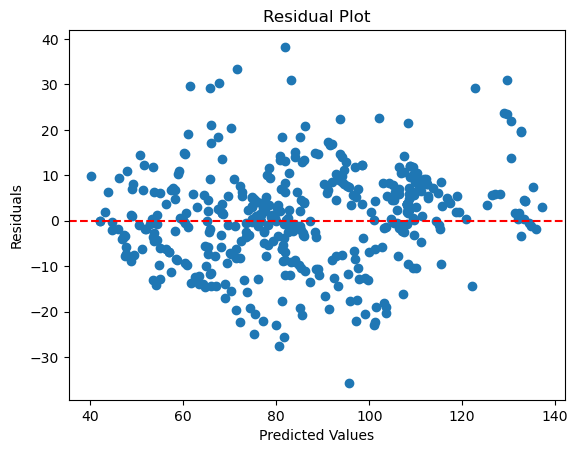

Mean Absolute Error (MAE) 8.18:
Mean Squared Error (MSE) 114.77:
Root Mean Squared Error (RMSE) 10.71:
R-squared Score (R^2) 0.84:
Mean Absolute Percentage Error (MAPE) 10.40:


In [77]:
y_pred9 = gradient_boosting.predict(X_test)

residuals9 = y_test - y_pred9
display_residualplot(residuals9, y_pred9)
evaluate_the_model(y_test, y_pred9)

### AdaBoostRegressor

In [78]:
from sklearn.ensemble import AdaBoostRegressor

In [79]:
base_model = DecisionTreeRegressor(max_depth=2)  # Defining the base estimator
adaboost = AdaBoostRegressor(base_model, n_estimators=50, random_state=42)  # Number of base estimators
print_crossval(cross_validate(adaboost, X_train, y_train,scoring='neg_mean_absolute_error', cv=10))
adaboost.fit(X_train, y_train)

MAE = 15.260 (Mean Absolute Error for cross validation)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                  random_state=42)

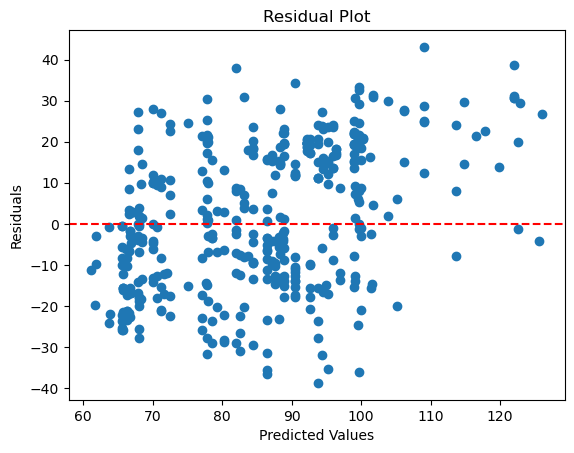

Mean Absolute Error (MAE) 15.03:
Mean Squared Error (MSE) 304.12:
Root Mean Squared Error (RMSE) 17.44:
R-squared Score (R^2) 0.57:
Mean Absolute Percentage Error (MAPE) 19.29:


In [80]:
y_pred14 = adaboost.predict(X_test)

residuals14 = y_test - y_pred14
display_residualplot(residuals14, y_pred14)
evaluate_the_model(y_test, y_pred14)